### Importing data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Billing analysis



In [ ]:
ingreso1 = tienda['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

ingresos = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso1, ingreso2, ingreso3, ingreso4]
}

ingresos_df = pd.DataFrame(ingresos)

pd.options.display.float_format = '{:,.2f}'.format

print(ingresos_df)


     Tienda    Ingreso Total
0  Tienda 1 1,150,880,400.00
1  Tienda 2 1,116,343,500.00
2  Tienda 3 1,098,019,600.00
3  Tienda 4 1,038,375,700.00


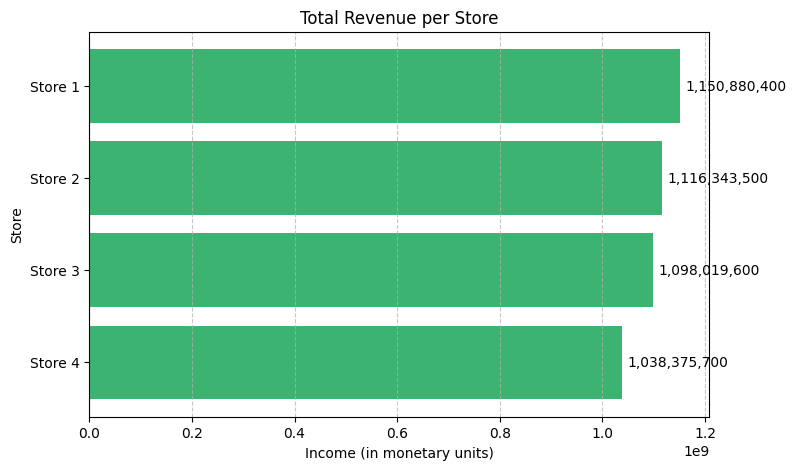

In [ ]:
ingresos = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

nombres_tiendas = ['Store 1', 'Store 2', 'Store 3', 'Store 4']

plt.figure(figsize=(8,5))
bars = plt.barh(nombres_tiendas, ingresos, color='mediumseagreen')
plt.title('Total Revenue per Store')
plt.xlabel('Income (in monetary units)')
plt.ylabel('Store')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + width * 0.01, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}', va='center')

plt.savefig('Ingresos_totales_por_tienda.png')
plt.show()
plt.close()


# 2. Sales by category

In [ ]:
def contar_productos_por_categoria(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts().reset_index()
    conteo.columns = ['Categoría', 'Cantidad Vendida']
    conteo['Tienda'] = nombre_tienda
    return conteo

categorias_tienda = contar_productos_por_categoria(tienda, 'Tienda 1')
categorias_tienda2 = contar_productos_por_categoria(tienda2, 'Tienda 2')
categorias_tienda3 = contar_productos_por_categoria(tienda3, 'Tienda 3')
categorias_tienda4 = contar_productos_por_categoria(tienda4, 'Tienda 4')

categorias_totales = pd.concat([categorias_tienda, categorias_tienda2, categorias_tienda3, categorias_tienda4])

print(categorias_totales)

                 Categoría  Cantidad Vendida    Tienda
0                  Muebles               465  Tienda 1
1             Electrónicos               448  Tienda 1
2                 Juguetes               324  Tienda 1
3        Electrodomésticos               312  Tienda 1
4     Deportes y diversión               284  Tienda 1
5   Instrumentos musicales               182  Tienda 1
6                   Libros               173  Tienda 1
7  Artículos para el hogar               171  Tienda 1
0                  Muebles               442  Tienda 2
1             Electrónicos               422  Tienda 2
2                 Juguetes               313  Tienda 2
3        Electrodomésticos               305  Tienda 2
4     Deportes y diversión               275  Tienda 2
5   Instrumentos musicales               224  Tienda 2
6                   Libros               197  Tienda 2
7  Artículos para el hogar               181  Tienda 2
0                  Muebles               499  Tienda 3
1         

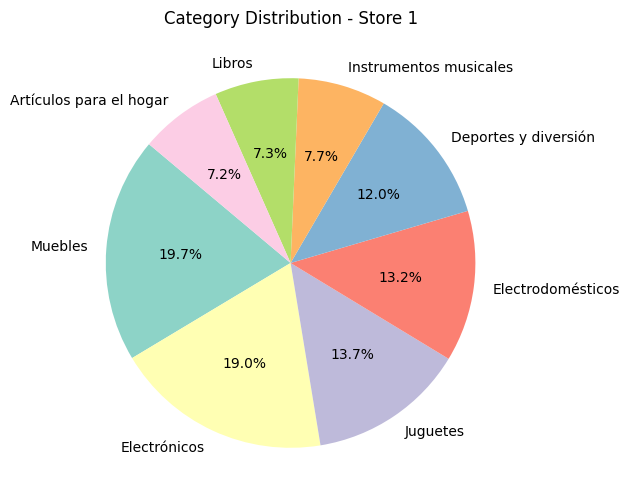


--------------------------------------------------------------------------------



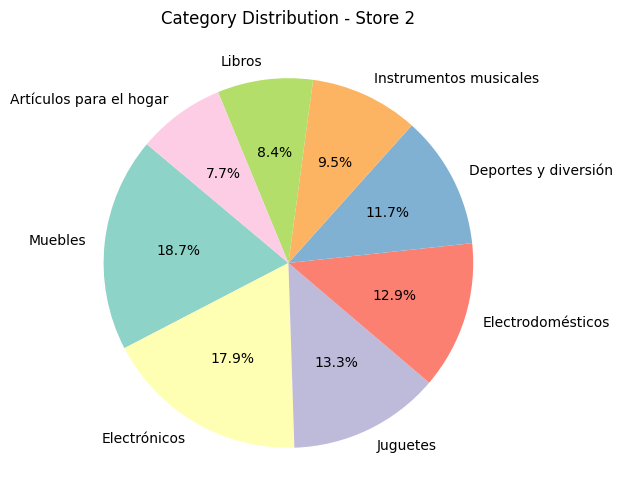


--------------------------------------------------------------------------------



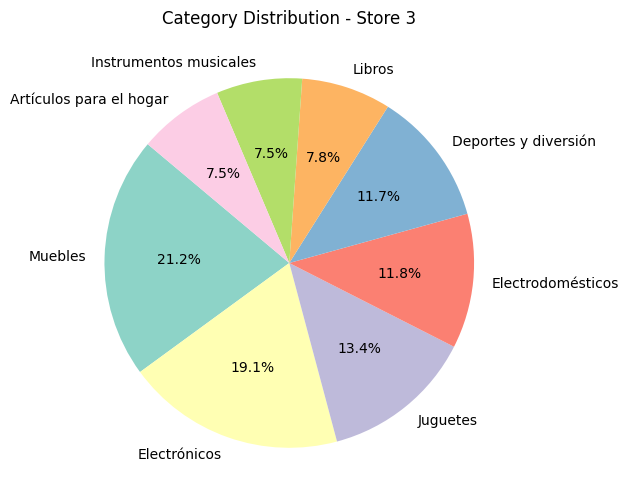


--------------------------------------------------------------------------------



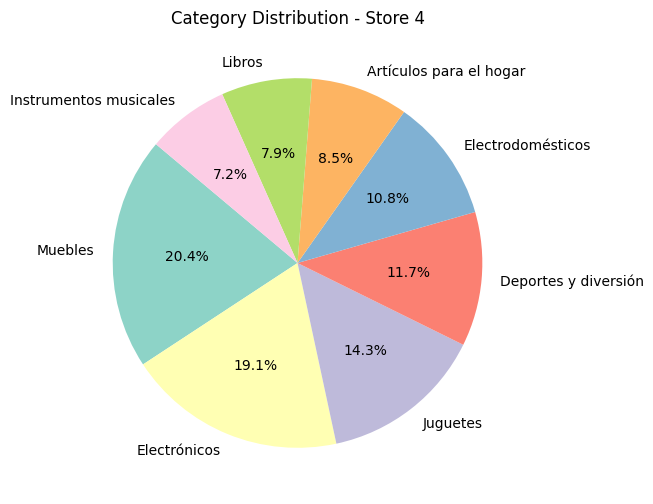


--------------------------------------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Store 1', 'Store 2', 'Store 3', 'Store 4']

for i, (df, nombre) in enumerate(zip(tiendas, nombres_tiendas), start=1):
    categorias = df['Categoría del Producto'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%',
            startangle=140, colors=plt.cm.Set3.colors)

    plt.title(f'Category Distribution - {nombre}')

    archivo_individual = f'distribucion_categorias_{nombre.lower().replace(" ", "_")}.png'
    plt.savefig(archivo_individual, bbox_inches='tight')


    plt.show()
    plt.close()
    print("\n" + "-"*80 + "\n")


# 3. Average store rating


In [ ]:
def promedio_calificacion(df):
    return df['Calificación'].mean()

promedio1 = promedio_calificacion(tienda)
promedio2 = promedio_calificacion(tienda2)
promedio3 = promedio_calificacion(tienda3)
promedio4 = promedio_calificacion(tienda4)

promedios = {
    'Store': ['Store 1', 'Store 2', 'Store 3', 'Store 4'],
    'Grade Point Average': [promedio1, promedio2, promedio3, promedio4]
}

promedios_df = pd.DataFrame(promedios)

print(promedios_df)

     Store  Grade Point Average
0  Store 1                 3.98
1  Store 2                 4.04
2  Store 3                 4.05
3  Store 4                 4.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

promedios_calificacion = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

nombres_tiendas = ['Store 1', 'Store 2', 'Store 3', 'Store 4']

import pandas as pd
calificaciones_df = pd.DataFrame({
    'Store': nombres_tiendas,
    'Grade Point Average': promedios_calificacion
})


<ipython-input-15-c9596180811e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


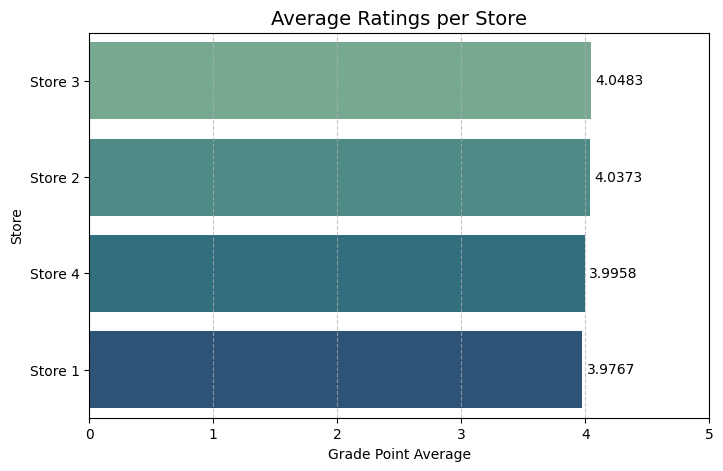

In [ ]:
calificaciones_df = calificaciones_df.sort_values('Grade Point Average', ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=calificaciones_df,
    y='Store',
    x='Grade Point Average',
    palette='crest'
)

for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', label_type='edge', padding=3)

plt.title('Average Ratings per Store', fontsize=14)
plt.xlim(0, 5)
plt.xlabel('Grade Point Average')
plt.ylabel('Store')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig('Promedio_de_Calificaciones_por_Tienda.png')
plt.show()
plt.close()


# 4. Most and least sold products

In [ ]:
def productos_extremos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()

    mas_vendido = conteo.idxmax()
    ventas_mas_vendido = conteo.max()

    menos_vendido = conteo.idxmin()
    ventas_menos_vendido = conteo.min()

    print(f"\n{nombre_tienda}")
    print(f"Best-selling product: {mas_vendido} ({ventas_mas_vendido} sales)")
    print(f"Least sold product: {menos_vendido} ({ventas_menos_vendido} sales)")


productos_extremos(tienda, 'Store 1')
productos_extremos(tienda2, 'Store 2')
productos_extremos(tienda3, 'Store 3')
productos_extremos(tienda4, 'Store 4')


Store 1
Best-selling product: Microondas (60 sales)
Least sold product: Auriculares con micrófono (33 sales)

Store 2
Best-selling product: Iniciando en programación (65 sales)
Least sold product: Juego de mesa (32 sales)

Store 3
Best-selling product: Kit de bancas (57 sales)
Least sold product: Bloques de construcción (35 sales)

Store 4
Best-selling product: Cama box (62 sales)
Least sold product: Guitarra eléctrica (33 sales)


# 5. Average shipping per store

In [ ]:
def promedio_costo_envio(df):
    return df['Costo de envío'].mean()

promedio_envio1 = promedio_costo_envio(tienda)
promedio_envio2 = promedio_costo_envio(tienda2)
promedio_envio3 = promedio_costo_envio(tienda3)
promedio_envio4 = promedio_costo_envio(tienda4)

costos_envio = {
    'Store': ['Store 1', 'Store 2', 'Store 3', 'Store 4'],
    'Average Shipping Cost': [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]
}

costos_envio_df = pd.DataFrame(costos_envio)

print(costos_envio_df)

     Store  Average Shipping Cost
0  Store 1              26,018.61
1  Store 2              25,216.24
2  Store 3              24,805.68
3  Store 4              23,459.46


#Revenue

If we assume that the only investment/cost is shipping, I can calculate the Profit as:

`Profit = Price - Shipping Cost`

* **Store 1: $1,089,502,500.00 monetary units**

* **Store 2: $1,056,858,400.00 monetary units**

* **Store 3: $1,039,503,000.00 monetary units**

* **Store 4: $983,058,300.00 monetary units**

Store 1 would be the one that would generate the most profit for Mr. Juan.


In [ ]:
ganancia1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
ganancia2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
ganancia3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
ganancia4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

ganancias = {
    'Store': ['Store 1', 'Store 2', 'Store 3', 'Store 4'],
    'Total Profit': [ganancia1, ganancia2, ganancia3, ganancia4]
}

ganancias_df = pd.DataFrame(ganancias)
print(ganancias_df)




     Store     Total Profit
0  Store 1 1,089,502,500.00
1  Store 2 1,056,858,400.00
2  Store 3 1,039,503,000.00
3  Store 4   983,058,300.00


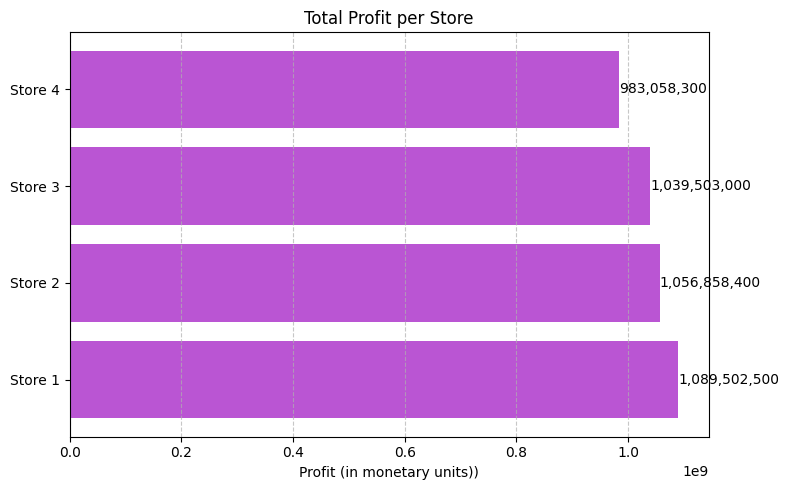

In [ ]:
import matplotlib.pyplot as plt

ganancia1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
ganancia2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
ganancia3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
ganancia4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

ganancias = [ganancia1, ganancia2, ganancia3, ganancia4]
nombres_tiendas = ['Store 1', 'Store 2', 'Store 3', 'Store 4']

plt.figure(figsize=(8,5))
bars = plt.barh(nombres_tiendas, ganancias, color='mediumorchid')
plt.title('Total Profit per Store')
plt.xlabel('Profit (in monetary units))')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center')

plt.tight_layout()
plt.show()


#Final Store Analysis Report
##Introduction
The objective of this analysis was to determine which store Mr. Juan should sell his products in. To do this, we analyzed each store's total revenue, the most and least sold product categories, average customer ratings, top-selling products, and average shipping costs. These factors are key to understanding which store offers the greatest opportunity for commercial success.




#Total Revenue
Revenue was calculated by adding the sales prices of all products in each store.
The analysis showed that:

Store 1 had revenue of 1,150,880,400.00 monetary units.

Store 2 had revenue of 1,116,343,500.00 monetary units.

Store 3 had revenue of 1,098,019,600.00 monetary units.

Store 4 had revenue of 1,038,375,700.00 monetary units.

**Store 1 generated the highest revenue, indicating a stronger sales volume.**

Bar chart shown: Total Revenue by Store, below:

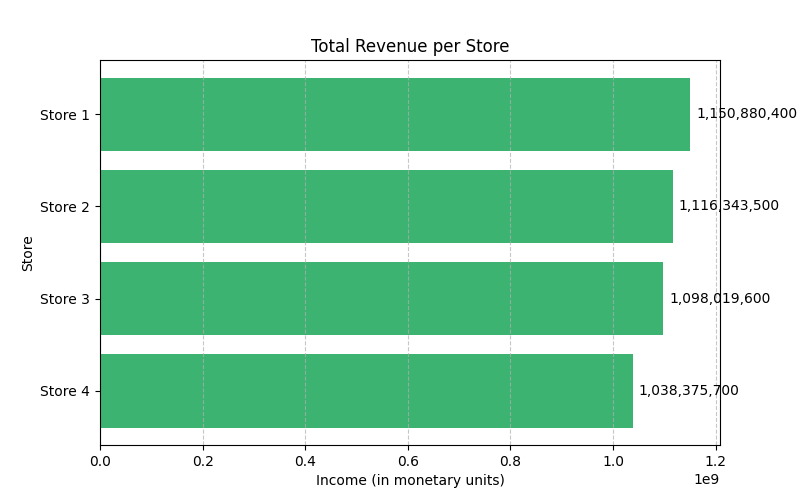

In [ ]:
from IPython.display import Image, display

display(Image('Ingresos_totales_por_tienda.png'))



#Category Distribution
The sales distribution by product category was analyzed across all stores.

**The pie chart showed that the categories "Furniture," "Electronics," "Toys," "Appliances," and "Sports and Entertainment" were the most popular in stores 1, 2, and 3, while store 4 did not rank among those categories.**

**The "Household Goods" category had lower sales in stores 1, 2, and 3, but not in store 4.**

This is relevant for aligning the type of product Mr. John could sell.

Below are the Category Distribution charts by store, payment method, and category vs. price:

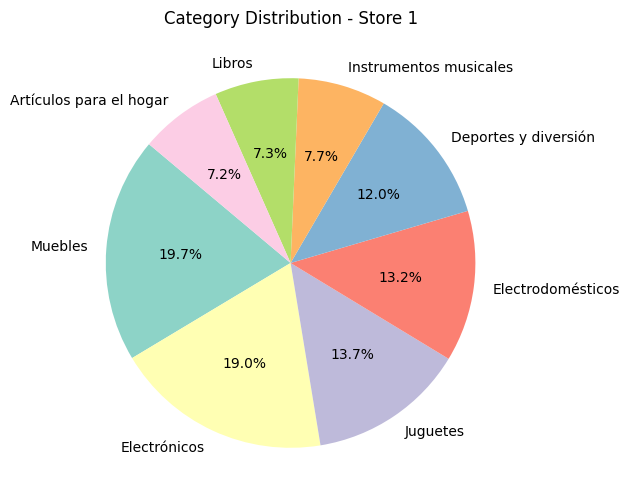


--------------------------------------------------------------------------------



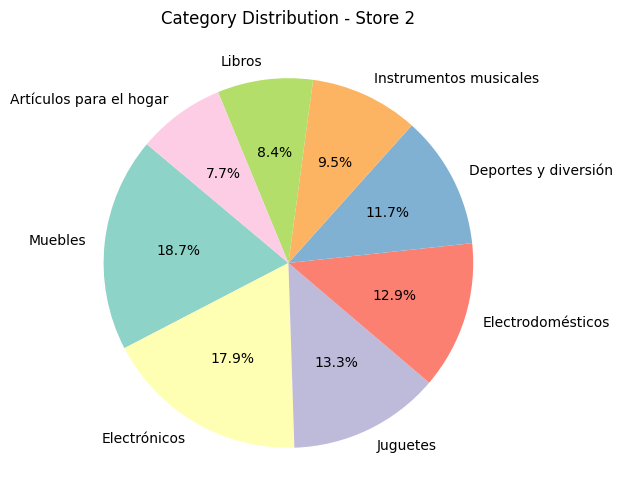


--------------------------------------------------------------------------------



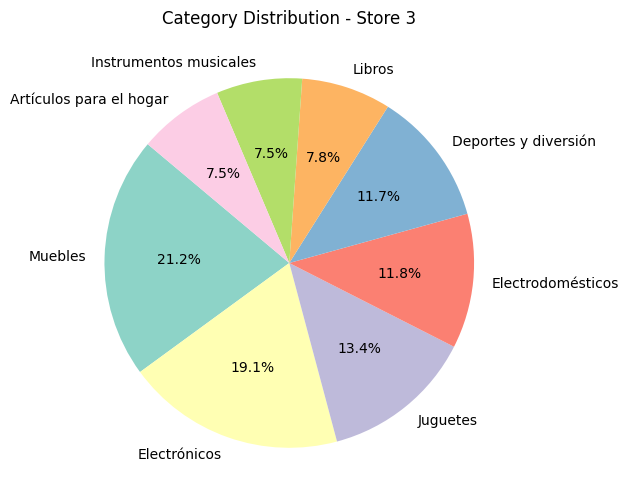


--------------------------------------------------------------------------------



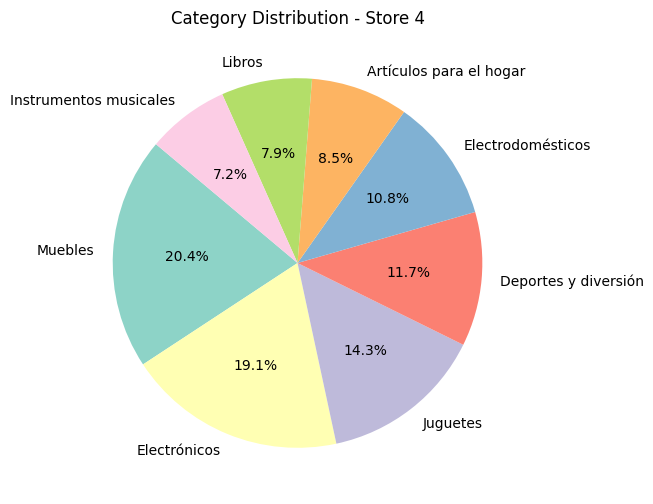

In [ ]:
display(Image('distribucion_categorias_store_1.png'))
print("\n" + "-"*80 + "\n")
display(Image('distribucion_categorias_store_2.png'))
print("\n" + "-"*80 + "\n")
display(Image('distribucion_categorias_store_3.png'))
print("\n" + "-"*80 + "\n")
display(Image('distribucion_categorias_store_4.png'))


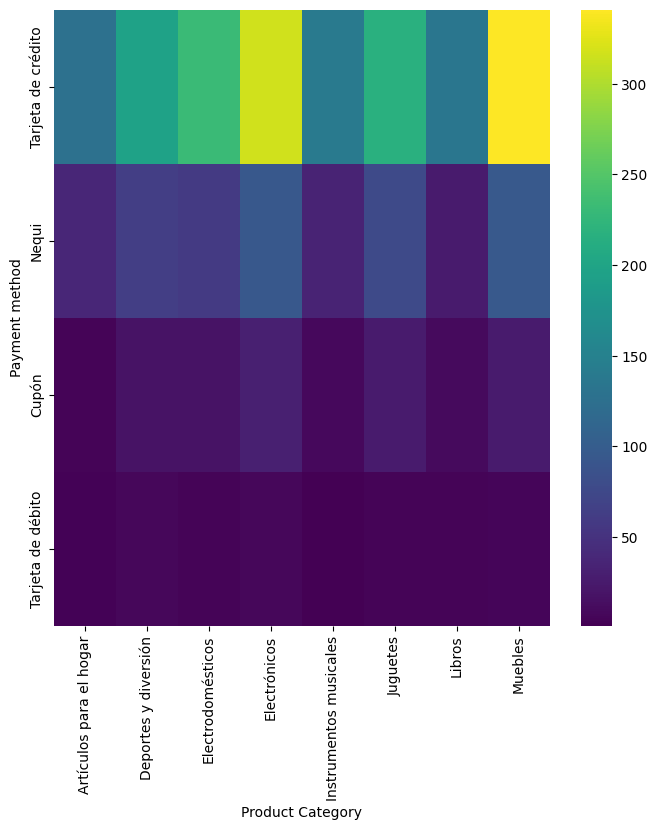

In [ ]:
# @title Product Category vs. Payment Method

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Método de pago'].value_counts()
    for x_label, grp in tienda.groupby('Categoría del Producto')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Product Category')
_ = plt.ylabel('Payment method')

<ipython-input-69-9c566005c5f4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(tienda, x='Price', y='Product Category', inner='box', palette='Dark2')


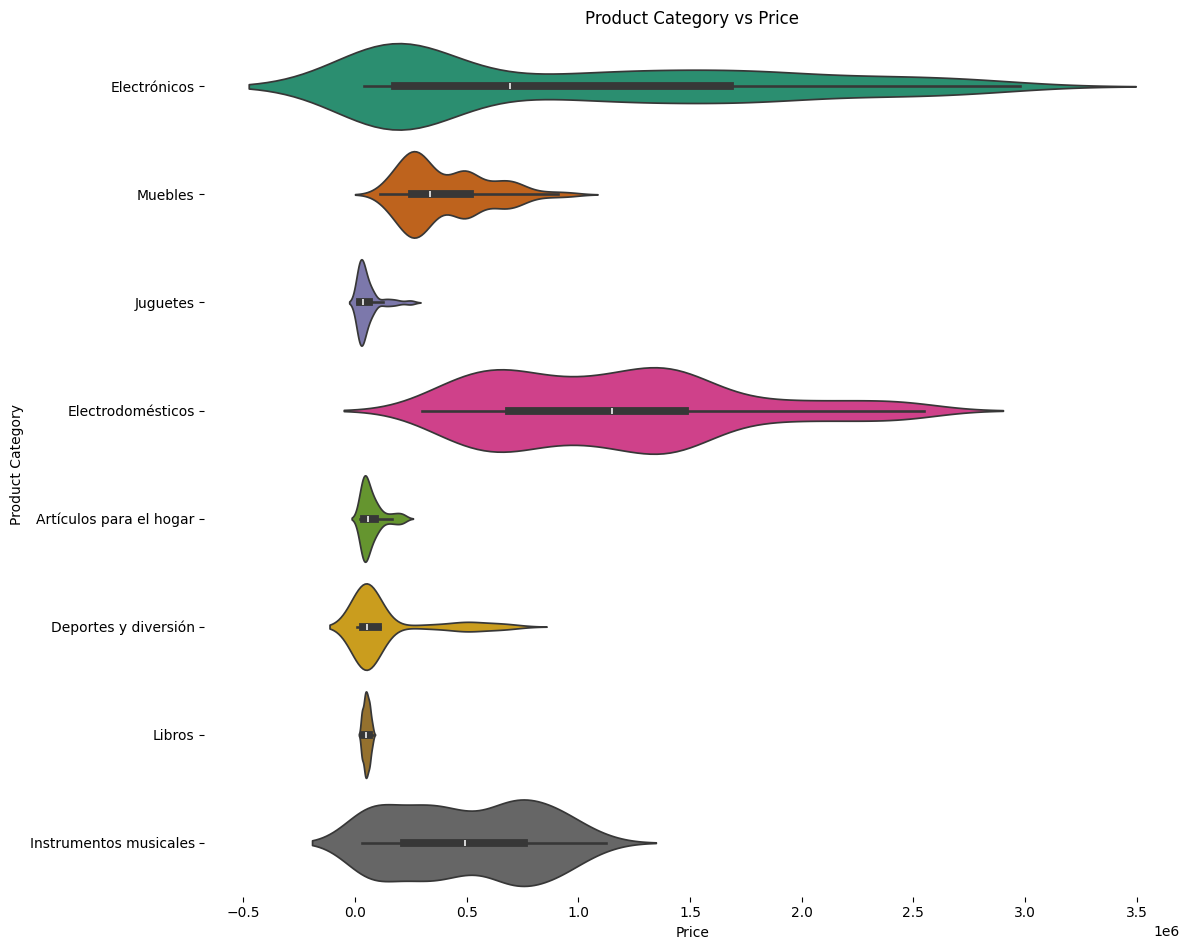

In [ ]:
# @title Product Category vs Price

tienda = tienda.rename(columns={'Categoría del Producto': 'Product Category'})
tienda = tienda.rename(columns={'Precio': 'Price'})

from matplotlib import pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(tienda['Product Category'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(tienda, x='Price', y='Product Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Product Category vs Price')
plt.xlabel('Price')
plt.ylabel('Product Category')
plt.tight_layout()
plt.savefig('product_category_vs_price.png', dpi=300)
plt.show()



#Average Ratings
Analyzing customer satisfaction:

Store 1: average of 3.9767 stars.

Store 2: average of 4.0373 stars.

Store 3: average of 4.0483 stars.

Store 4: average of 3.9958 stars.

**The store with the highest satisfaction was Store 3, which suggests happier customers and possibly greater loyalty.**

Bar chart shown: Average Ratings by Store, below:

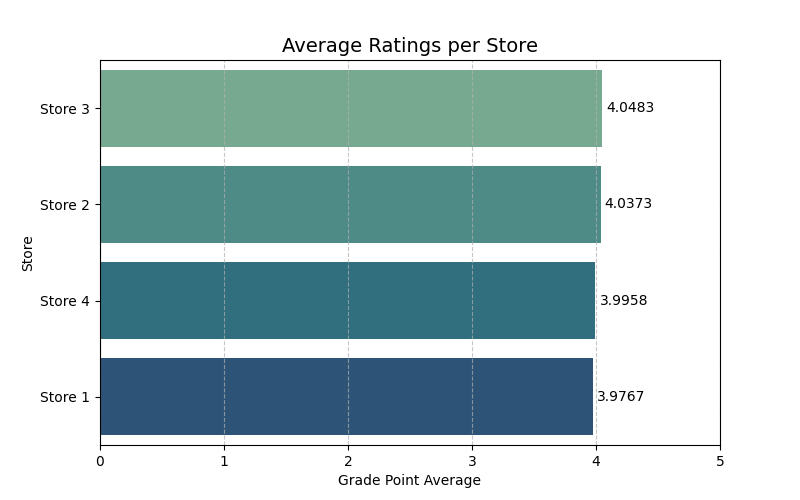

In [ ]:
from IPython.display import Image, display

display(Image('Promedio_de_Calificaciones_por_Tienda.png'))

#Most and Least Sold Products
The most popular products in each store were identified.

Store 1
Most sold product: Microwave (60 sales)
Least sold product: Headphones with microphone (33 sales)

Store 2
Most sold product: Beginners in programming (65 sales)
Least sold product: Board game (32 sales)

Store 3
Most sold product: Bench kit (57 sales)
Least sold product: Building blocks (35 sales)

Store 4
Most sold product: Box bed (62 sales)
Least sold product: Electric guitar (33 sales)

This allows us to understand which products are in highest demand and adjust our supply if necessary.




Store 1
Most sold product: Microondas (60 sales)
Least sold product: Auriculares con micrófono (33 sales)


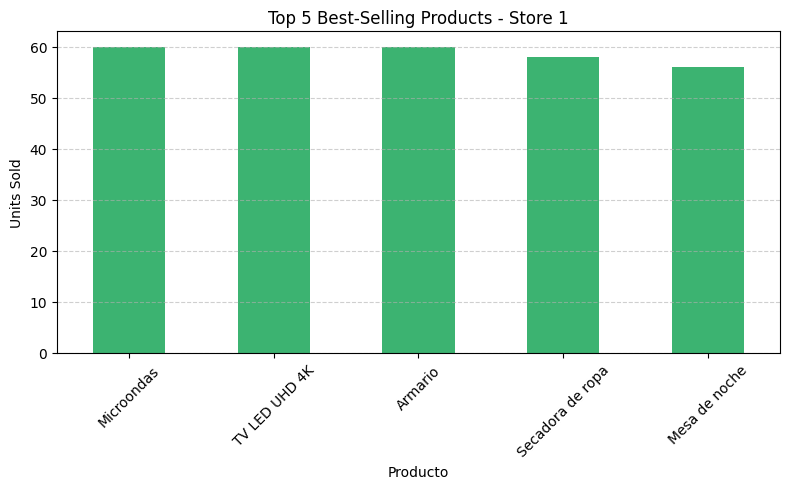


Store 2
Most sold product: Iniciando en programación (65 sales)
Least sold product: Juego de mesa (32 sales)


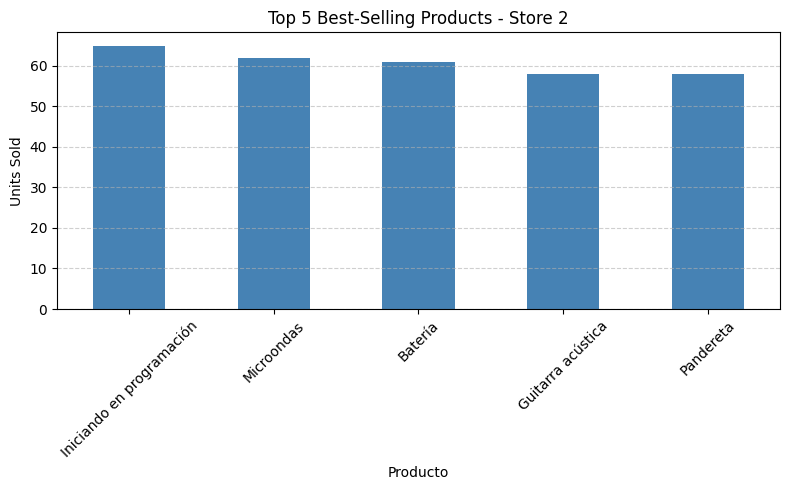


Store 3
Most sold product: Kit de bancas (57 sales)
Least sold product: Bloques de construcción (35 sales)


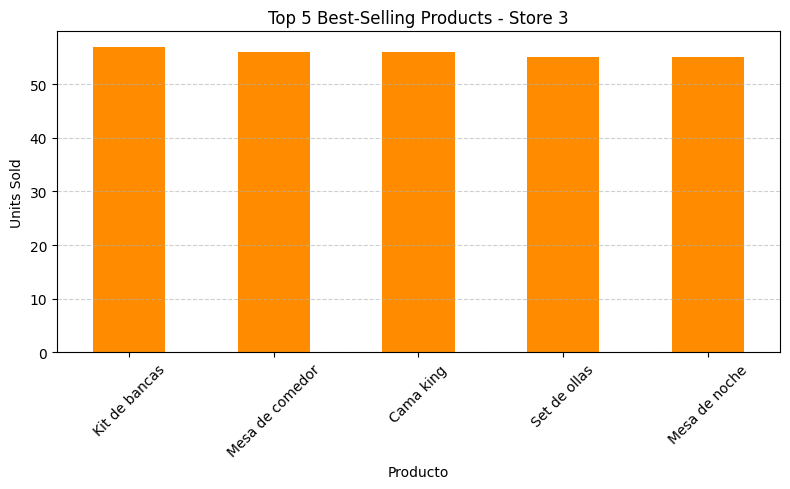


Store 4
Most sold product: Cama box (62 sales)
Least sold product: Guitarra eléctrica (33 sales)


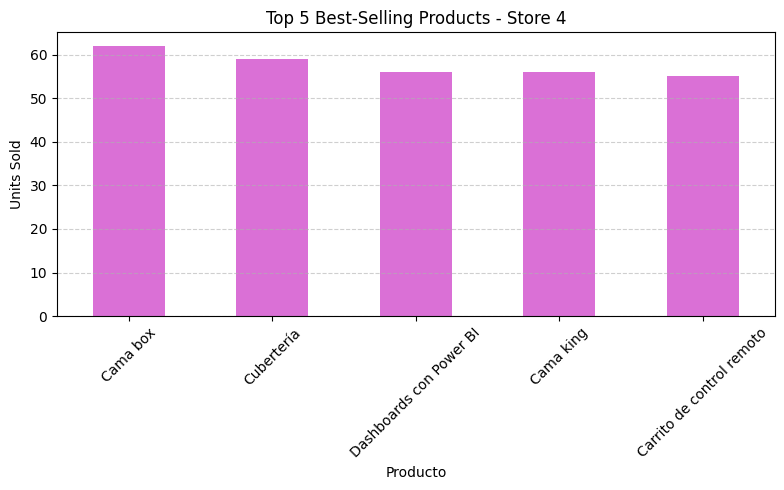

In [ ]:
import matplotlib.pyplot as plt

store_colors = {
    'Store 1': 'mediumseagreen',
    'Store 2': 'steelblue',
    'Store 3': 'darkorange',
    'Store 4': 'orchid'
}

def extreme_products(df, store_name):
    counts = df['Producto'].value_counts()

    most_sold = counts.idxmax()
    most_sold_qty = counts.max()

    least_sold = counts.idxmin()
    least_sold_qty = counts.min()

    print(f"\n{store_name}")
    print(f"Most sold product: {most_sold} ({most_sold_qty} sales)")
    print(f"Least sold product: {least_sold} ({least_sold_qty} sales)")

    top5 = counts.head(5)

    plt.figure(figsize=(8,5))
    top5.plot(kind='bar', color=store_colors[store_name])
    plt.title(f'Top 5 Best-Selling Products - {store_name}')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    file_name = f'top5_products_{store_name.lower().replace(" ", "_")}.png'
    plt.savefig(file_name, dpi=300)
    plt.show()

# Call the function with each store
extreme_products(tienda, 'Store 1')
extreme_products(tienda2, 'Store 2')
extreme_products(tienda3, 'Store 3')
extreme_products(tienda4, 'Store 4')


#Average Shipping Costs
The average shipping cost for each store was:

* **Store 1: $26,019 units**

* **Store 2: $25,216 units**

* **Store 3: $24,806 units**

* **Store 4: $23,459 units**

Stores with lower shipping costs can represent a competitive advantage for customers.



<ipython-input-61-230d8fc45c6f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


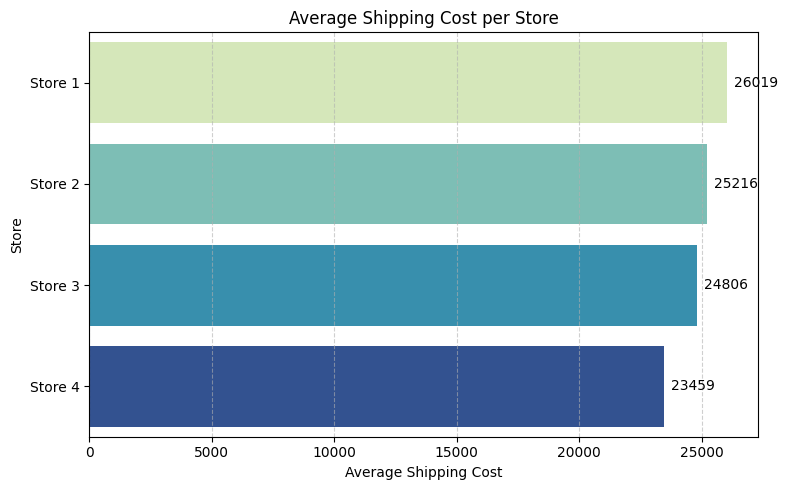

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costos_envio = {
    'Tienda': ['Store 1', 'Store 2', 'Store 3', 'Store 4'],
    'Costo de Envío Promedio': [promedio_envio1, promedio_envio2, promedio_envio3, promedio_envio4]
}
costos_envio_df = pd.DataFrame(costos_envio)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=costos_envio_df,
    y='Tienda',
    x='Costo de Envío Promedio',
    palette='YlGnBu'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

plt.title('Average Shipping Cost per Store')
plt.xlabel('Average Shipping Cost')
plt.ylabel('Store')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('costo_envio_promedio_por_tienda.png')
plt.show()



#Geographic Performance Analysis

The first chart uses:

1. Ion and latitude as locations.
2. The size of the dots to represent the product price.
3. The color to reflect the customer rating.




--------------------------------------------------------------------------------



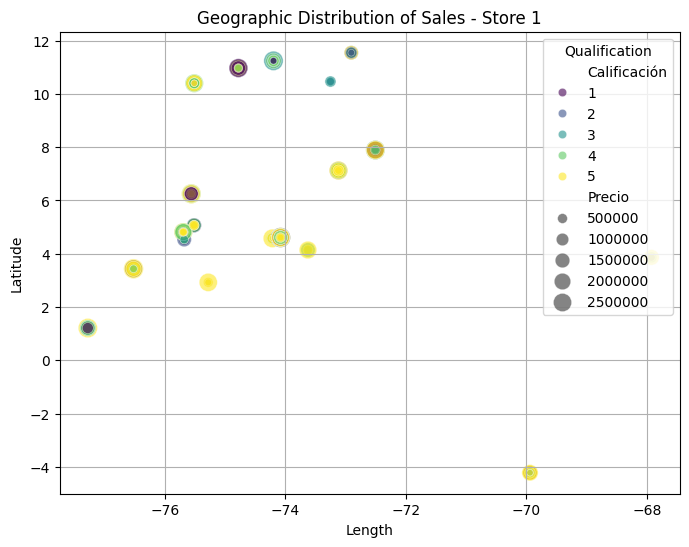


--------------------------------------------------------------------------------



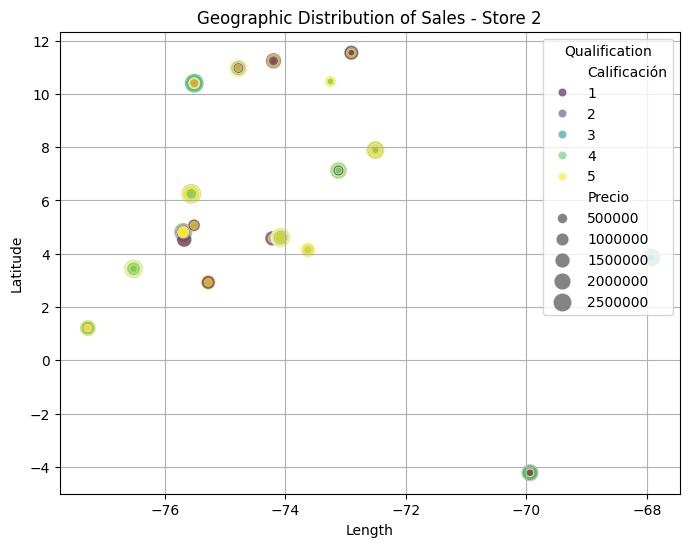


--------------------------------------------------------------------------------



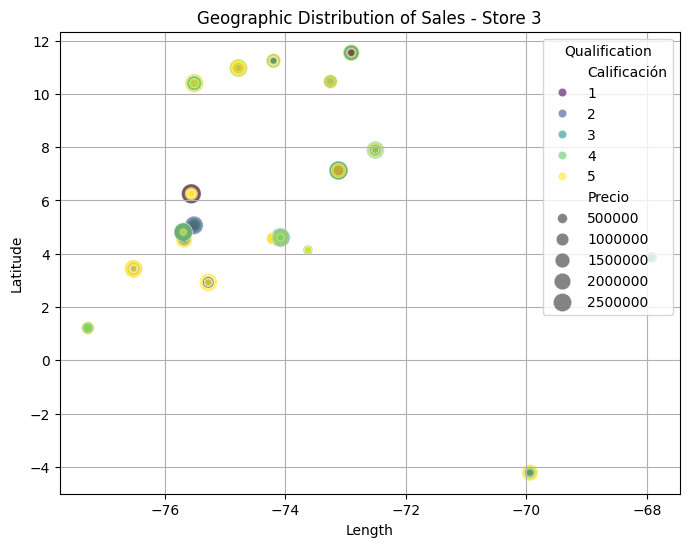


--------------------------------------------------------------------------------



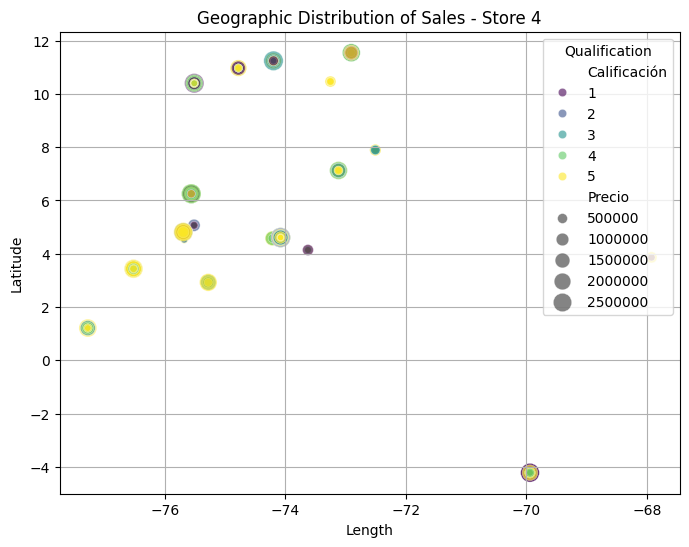

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Store 1', 'Store 2', 'Store 3', 'Store 4']

for df, nombre in zip(tiendas, nombres_tiendas):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='lon', y='lat', size='Precio', hue='Calificación', data=df, palette='viridis', sizes=(20, 200), alpha=0.6)
    plt.title(f'Geographic Distribution of Sales - {nombre}')
    plt.xlabel('Length')
    plt.ylabel('Latitude')
    plt.legend(title='Qualification')
    plt.grid(True)
    print("\n" + "-"*80 + "\n")
    plt.show()


##Sales Heat Map
This map shows all sales from all four stores. It calculates the center of the map based on the average latitude and longitude, and visually represents the areas with the most sales points using the Heat Map. The "hottest" spots (highest sales) will be more visible.

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

mapa_calor = folium.Map(location=[df_total['lat'].mean(), df_total['lon'].mean()], zoom_start=4)

heat_data = df_total[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=12).add_to(mapa_calor)

mapa_calor


#Conclusion
Based on the analysis conducted, it is recommended that Mr. John sell in Store 4. Store 4:

* Has the lowest total revenue, with Store 1 having the highest total revenue and a more active market.

* Does not have high customer satisfaction ratings; it is second to last on the list, with Store 3 having the highest customer satisfaction ratings.

* Does not have top-selling product categories aligned with the product profile Mr. John can offer, with Stores 1, 2, and 3 having the top-selling categories.

* Has the lowest shipping costs, but its profit is the lowest. Unlike Store 1, which improves competitiveness with a better shipping cost/total revenue ratio.

* The map visually shows where the highest sales are by store and its latitude and longitude, with Store 1 predominating due to its better shipping cost/sales ratio.

**Therefore, Store 4 represents the worst opportunity to maximize sales and customer satisfaction; it does not guarantee a profitable and sustainable business. Therefore, Mr. Juan should sell Store 4.**